<a href="https://colab.research.google.com/github/Redcoder815/Machine_Learning/blob/main/KNNClassificationAndRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
1.0


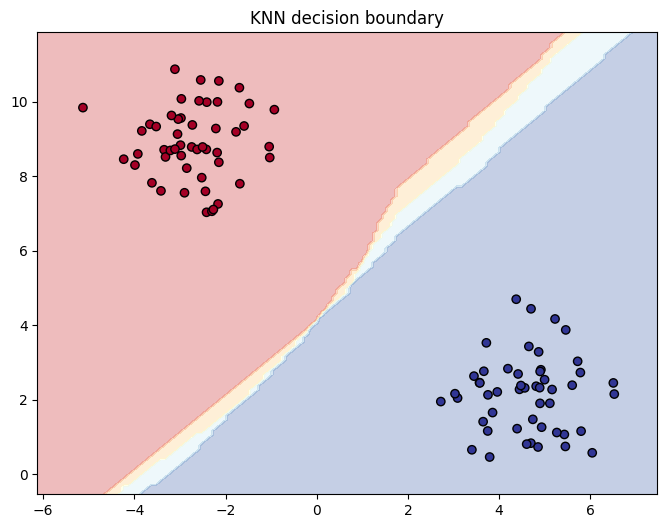

In [35]:
from numpy._core.fromnumeric import reshape
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

class KNN:
  def __init__(self, k = 3):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def prediction(self, X):
    return np.array([self.predict(x) for x in X])

  def predict(self,x):
    distances = [np.sqrt(np.sum((x-x_train)**2))for x_train in self.X_train]
    k_indices = np.argsort(distances)[:self.k]
    # classification
    # k_nearest_labels = [self.y_train[i] for i in k_indices]
    # most_common = Counter(k_nearest_labels).most_common(1)
    # return most_common[0][0]

    # regression
    k_neighbour_values = self.y_train[k_indices]
    return np.mean(k_neighbour_values)

  def decision_boundary(self, X, y, title="KNN decision boundary"):
    h = 0.1
    x_min, x_max = X[:,0].min()-1,X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1,X[:,1].max()+1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = self.prediction(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.show()


X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
knn = KNN(k=3)
knn.fit(X_train, y_train)
predictions = knn.prediction(X_test)
print(predictions)
accuracy = np.sum(predictions == y_test) / len(y_test)
print(accuracy)

knn.decision_boundary(X,y)